/opt/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/var/folders/mq/l3d9x9j17q37b0ngctfcb5ph0000gn/T/ipykernel_13901/736863328.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bond_prices['Unnamed: 0'].fillna(method='ffill', inplace=True)
/var/folders/mq/l3d9x9j17q37b0ngctfcb5ph0000gn/T/ipykernel_13901/736863328.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bond_prices['Date'] = pd.to_datetime(bond_prices['Year'].astype(str) + ' ' + bond_prices['No.'], errors='coerce')


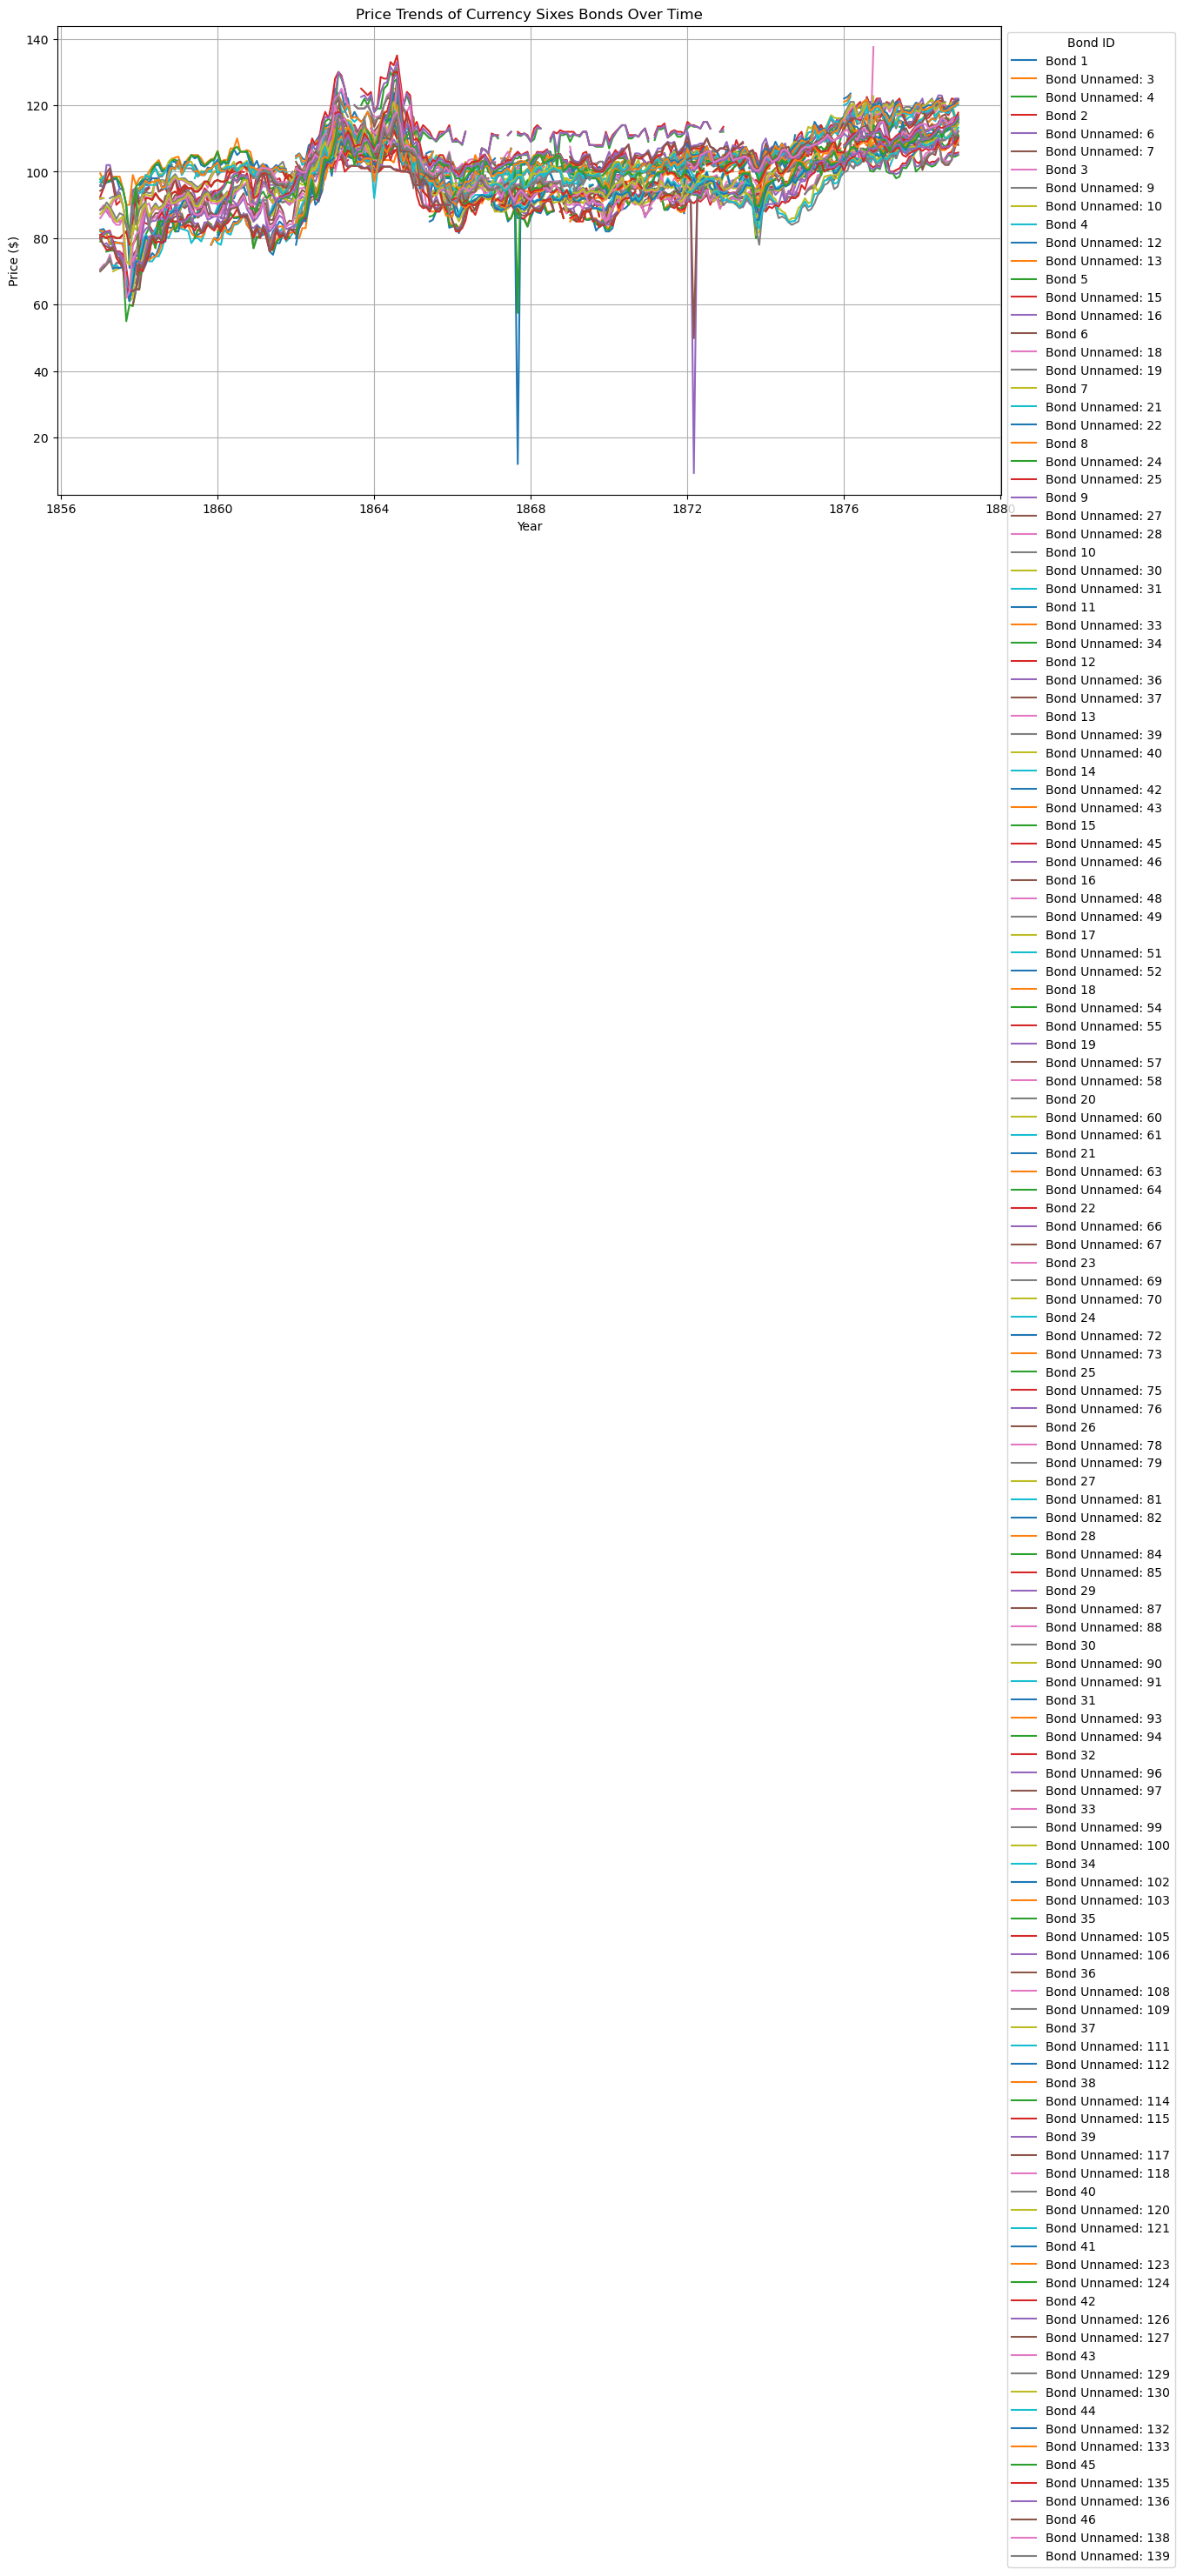

/opt/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/var/folders/mq/l3d9x9j17q37b0ngctfcb5ph0000gn/T/ipykernel_13901/736863328.py:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bond_yields['Unnamed: 0'].fillna(method='ffill', inplace=True)
/var/folders/mq/l3d9x9j17q37b0ngctfcb5ph0000gn/T/ipykernel_13901/736863328.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bond_yields['Date'] = pd.to_datetime(bond_yields['Year'].astype(str) + ' ' + bond_yields['No.'], errors='coerce')


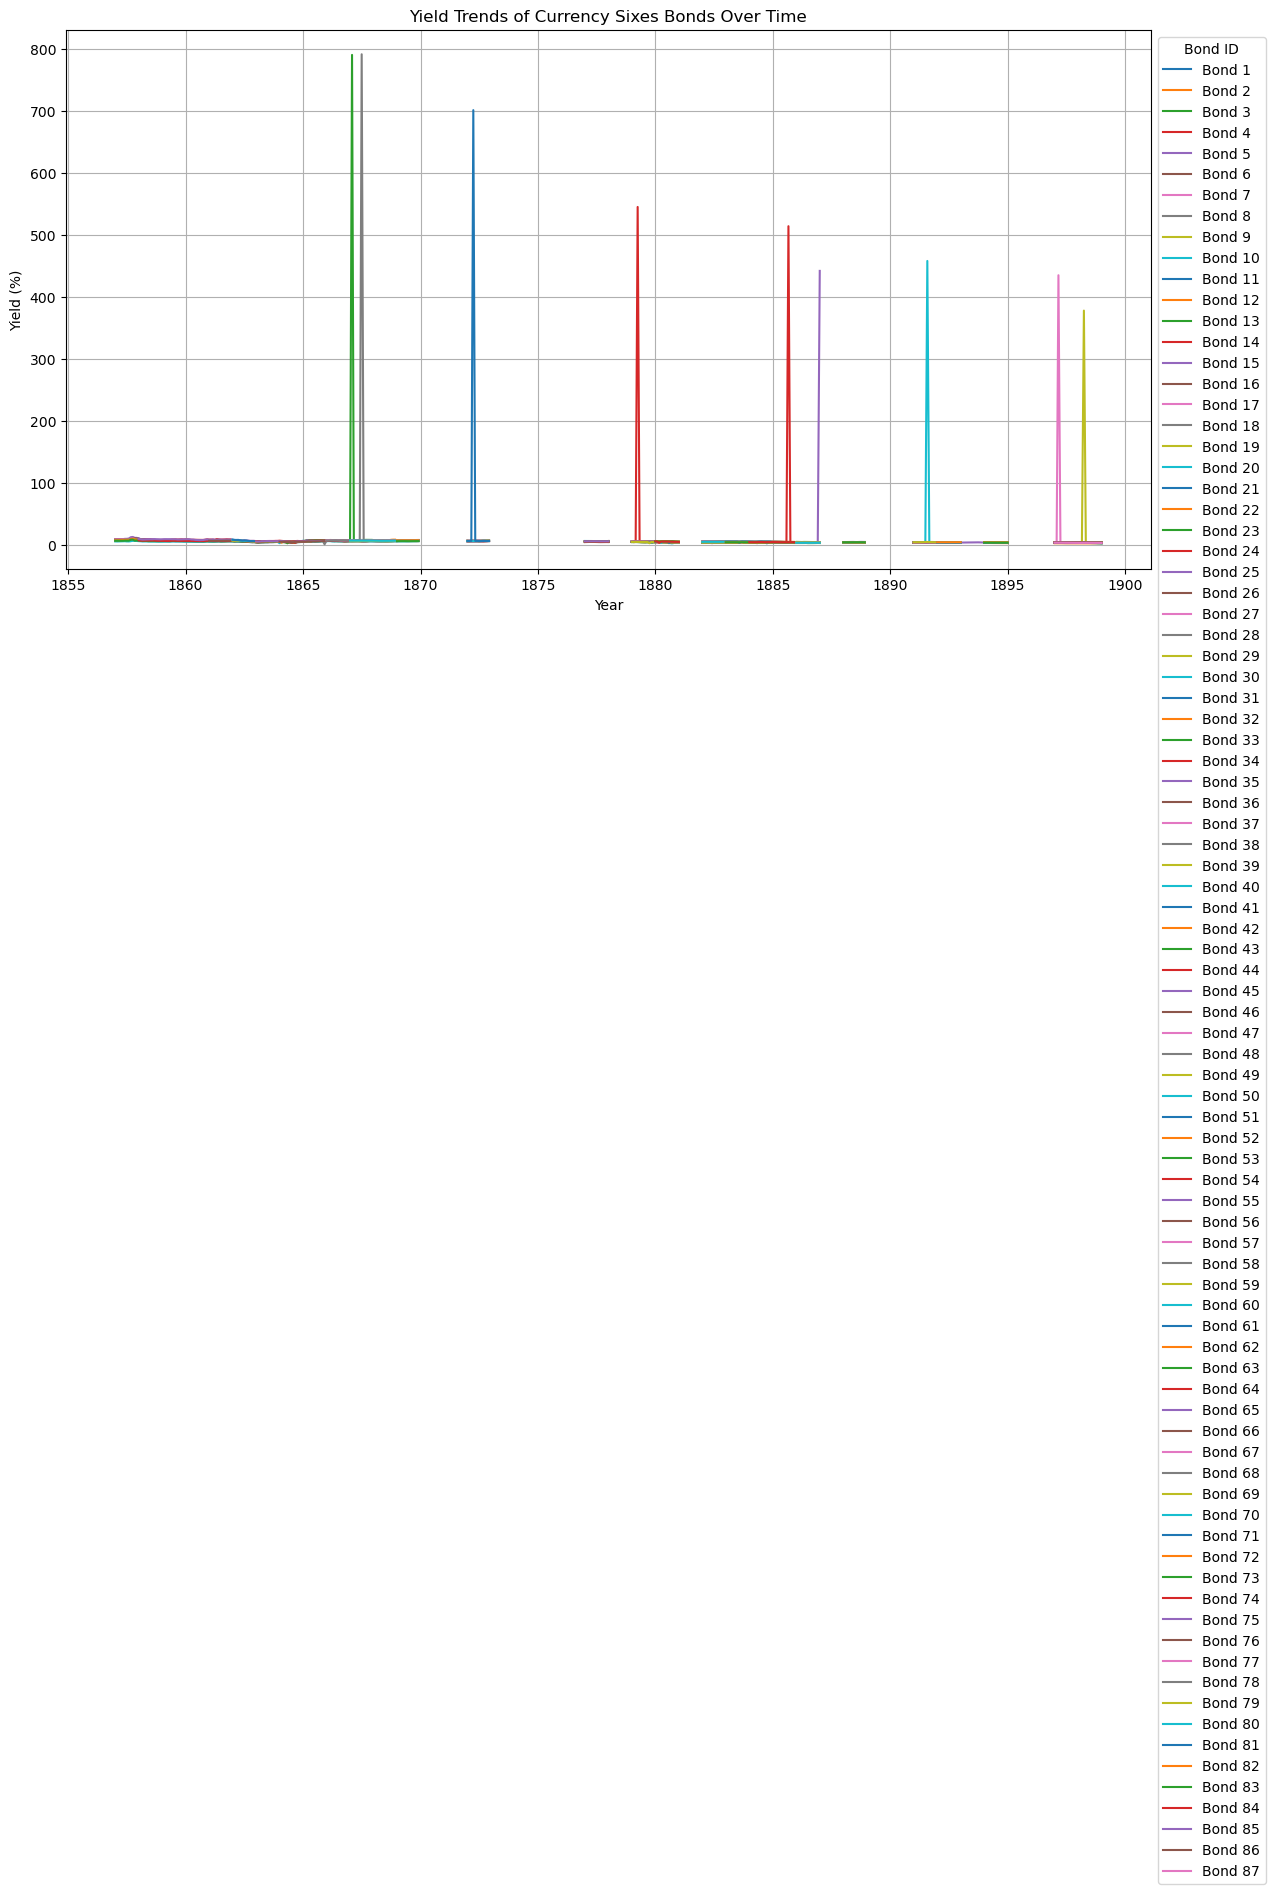

Bond biography created successfully!

### Bond Biography: The Currency Sixes

#### Overview
The Currency Sixes bonds were instrumental in financing the construction of the Transcontinental Railroads in the United States. These bonds played a crucial role in the economic development of the country during the 19th century.

#### Features of the Bond
- **Issue Date:** The Currency Sixes were issued between 1862 and 1869.
- **Coupon Rate:** These bonds had a coupon rate of 6%, paid semi-annually.
- **Maturity Date:** The bonds had varied maturity dates, typically ranging from 10 to 30 years.
- **Principal Value:** The bonds were typically issued with a principal value of $1,000.

#### Purpose of Issuance
The primary purpose of issuing the Currency Sixes was to fund the construction of the Transcontinental Railroads, which were essential for connecting the eastern and western United States. This infrastructure project facilitated trade, travel, and economic expansion across the country.

##

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

prices_file_path = '/Users/sanjeevsubramanian/Downloads/Currency Six/Macaulay_table2_railroad_bond_prices.xlsx'
bond_prices = pd.read_excel(prices_file_path)

bond_prices = bond_prices.drop(0)
bond_prices['Unnamed: 0'].fillna(method='ffill', inplace=True)
bond_prices.rename(columns={'Unnamed: 0': 'Year'}, inplace=True)

bond_prices['No.'] = bond_prices['No.'].str.replace('Febuary', 'February')

bond_prices['Date'] = pd.to_datetime(bond_prices['Year'].astype(str) + ' ' + bond_prices['No.'], errors='coerce')

price_columns = [col for col in bond_prices.columns if col not in ['Year', 'No.', 'Date', 'Unnamed: 89']]
bond_prices[price_columns] = bond_prices[price_columns].apply(pd.to_numeric, errors='coerce')

valid_price_columns = bond_prices[price_columns].dropna(thresh=int(0.2 * len(bond_prices))).columns.tolist()

plt.figure(figsize=(14, 7))
for column in valid_price_columns:
    plt.plot(bond_prices['Date'], bond_prices[column], label=f'Bond {column}')

plt.title('Price Trends of Currency Sixes Bonds Over Time')
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.legend(title='Bond ID', loc='upper left', bbox_to_anchor=(1,1))
plt.grid(True)
plt.show()

yields_file_path = '/Users/sanjeevsubramanian/Downloads/Currency Six/Macaulay_table3_railroad_bond_yields.xlsx'
bond_yields = pd.read_excel(yields_file_path)

bond_yields = bond_yields.drop(0)
bond_yields['Unnamed: 0'].fillna(method='ffill', inplace=True)
bond_yields.rename(columns={'Unnamed: 0': 'Year'}, inplace=True)

bond_yields['No.'] = bond_yields['No.'].str.replace('Febuary', 'February')

bond_yields['Date'] = pd.to_datetime(bond_yields['Year'].astype(str) + ' ' + bond_yields['No.'], errors='coerce')

yield_columns = [col for col in bond_yields.columns if col not in ['Year', 'No.', 'Date', 'Unnamed: 89']]
bond_yields[yield_columns] = bond_yields[yield_columns].apply(pd.to_numeric, errors='coerce')

valid_yield_columns = bond_yields[yield_columns].dropna(thresh=int(0.2 * len(bond_yields))).columns.tolist()

plt.figure(figsize=(14, 7))
for column in valid_yield_columns:
    plt.plot(bond_yields['Date'], bond_yields[column], label=f'Bond {column}')

plt.title('Yield Trends of Currency Sixes Bonds Over Time')
plt.xlabel('Year')
plt.ylabel('Yield (%)')
plt.legend(title='Bond ID', loc='upper left', bbox_to_anchor=(1,1))
plt.grid(True)
plt.show()

biography = """
### Bond Biography: The Currency Sixes

#### Overview
The Currency Sixes bonds were instrumental in financing the construction of the Transcontinental Railroads in the United States. These bonds played a crucial role in the economic development of the country during the 19th century.

#### Features of the Bond
- **Issue Date:** The Currency Sixes were issued between 1862 and 1869.
- **Coupon Rate:** These bonds had a coupon rate of 6%, paid semi-annually.
- **Maturity Date:** The bonds had varied maturity dates, typically ranging from 10 to 30 years.
- **Principal Value:** The bonds were typically issued with a principal value of $1,000.

#### Purpose of Issuance
The primary purpose of issuing the Currency Sixes was to fund the construction of the Transcontinental Railroads, which were essential for connecting the eastern and western United States. This infrastructure project facilitated trade, travel, and economic expansion across the country.

#### Amount Authorized and Sold
Congress authorized a substantial amount of these bonds, with millions of dollars in bonds being sold to finance the railroads. The total amount sold varied over the years, reflecting the ongoing funding needs of the railroad construction.

#### Price History and Market Performance
The price trends of the Currency Sixes bonds show significant fluctuations over time. These trends were influenced by various factors, including economic conditions, investor confidence, and the progress of the railroad projects.

#### Redemption and Impact
The Currency Sixes were eventually redeemed, contributing to the completion of the Transcontinental Railroads. The bonds had a lasting impact on the economic landscape of the United States, facilitating growth and development.

### Historical Context
The issuance and performance of the Currency Sixes bonds were closely tied to the economic and political landscape of the time. Key events such as the Civil War, the Panic of 1873, and other economic crises affected the bond market and investor sentiment.

#### Notable Events
- **Panic of 1873:** This financial crisis led to significant fluctuations in bond prices as investors reacted to the economic downturn.
- **Completion of the Transcontinental Railroad:** The successful completion of the railroad projects boosted investor confidence and supported the bond prices.

#### Conclusion
The Currency Sixes bonds were a pivotal financial instrument in the history of the United States. Their role in funding the Transcontinental Railroads and their impact on the economic development of the country highlight the importance of these bonds in American history.
"""

with open('Currency_Sixes_Bond_Biography.md', 'w') as file:
    file.write(biography)

print("Bond biography created successfully!")

print(biography)
